In [1]:
import numpy as np
import pandas as pd

In [3]:
bf_dataset = pd.read_csv("./black_friday_train.csv")
bf_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
from sklearn.impute import SimpleImputer

In [14]:
Q1 = bf_dataset['Purchase'].quantile(0.25)
Q3 = bf_dataset['Purchase'].quantile(0.75)
IQR = Q3 - Q1

In [7]:
Imp=SimpleImputer(strategy="median",missing_values=np.nan)
Imp=SimpleImputer.fit(bf_dataset[['Purchase']])

TypeError: fit() missing 1 required positional argument: 'X'

In [10]:
# missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
bf_dataset['Purchase'] = imputer.fit_transform(bf_dataset[['Purchase']])

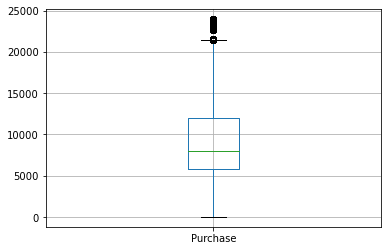

In [13]:
bf_dataset.boxplot(column=['Purchase']);

In [15]:
def outlier_detection(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range,upper_range

In [23]:
lowerbound,upperbound = outlier_detection(bf_dataset['Purchase'])

outliers = bf_dataset[(bf_dataset['Purchase'] < lowerbound) | (bf_dataset['Purchase'] > upperbound)]
outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,16.0,NaN,23603.0
375,1000062,P00119342,F,36-45,3,A,1,0,10,13.0,NaN,23792.0
652,1000126,P00087042,M,18-25,9,B,1,0,10,14.0,16.0,23233.0
736,1000139,P00159542,F,26-35,20,C,2,0,10,15.0,16.0,23595.0
1041,1000175,P00052842,F,26-35,2,B,1,0,10,15.0,NaN,23341.0
...,...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,13.0,16.0,23753.0
544704,1005847,P00085342,F,18-25,4,B,2,0,10,13.0,NaN,23724.0
544743,1005852,P00202242,F,26-35,1,A,0,1,10,16.0,NaN,23529.0
545663,1006002,P00116142,M,51-55,0,C,1,1,10,13.0,16.0,23663.0


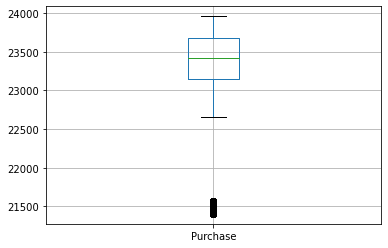

In [24]:
outliers.boxplot(column=['Purchase']);

C:\Users\jaspr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


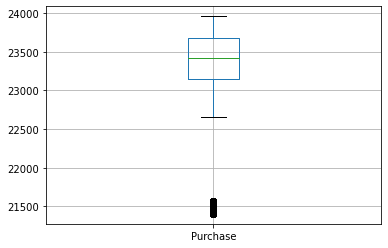

In [33]:
# Fitting the data to the imputer object 

Imp=SimpleImputer(strategy="mean",missing_values=5000)
outliers['Purchase']  = Imp.fit_transform(outliers[['Purchase']])
outliers.boxplot(column=['Purchase']);

___
# Automatic Outlier Detection <br>
## 2.1)Isolation Forest
## 2.2) Minimum Covariance Determinant
## 2.3) One-Class SVM

## 2.1)Isolation Forest
```python
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

# -------------------------------------------------------------------------
# | Once identified, we can remove the outliers from the training dataset |
# -------------------------------------------------------------------------
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
```